### Problem Statement- Predict can cancellations based on a Data set
Car cancellation is a dependent variable

In [185]:
#importing the libraries
import os
import numpy as np
import pandas as pd
import csv
import matplotlib.pyplot as plt
from sklearn import linear_model, metrics

pd.set_option('display.max_rows', 10)
pd.set_option('display.notebook_repr_html', True)
pd.set_option('display.max_columns', 10)

%matplotlib inline
plt.style.use('ggplot')


    ##Lets start by creating a Data frame

In [5]:
df = pd.read_csv('Kaggle_YourCabs_training.csv')

In [6]:
df.columns


Index([u'id', u'user_id', u'vehicle_model_id', u'package_id',
       u'travel_type_id', u'from_area_id', u'to_area_id', u'from_city_id',
       u'to_city_id', u'from_date', u'to_date', u'online_booking',
       u'mobile_site_booking', u'booking_created', u'from_lat', u'from_long',
       u'to_lat', u'to_long', u'Car_Cancellation', u'Cost_of_error'],
      dtype='object')

In [7]:
df['Car_Cancellation'].value_counts()


0    40299
1     3132
Name: Car_Cancellation, dtype: int64

##Finding the number of columns

In [8]:
len(df.columns)

20

In [9]:
# plot_scatter is a function that takes the index of a column and prints out a scatter plot
def plot_scatter(i):
    print "Plotting the data between %r and Car_cancellation " %df.columns[i]
    df[[i]].join(df[['Car_Cancellation']]).plot(kind='scatter',x=df.columns[i],y='Car_Cancellation')
  


In [10]:
# plot_hist is a function that takes the index of a column and prints out a scatter plot
def plot_hist(i):
    print "Plotting the Histogram between %r and Car_cancellation " %df.columns[i]
    df[[i]].join(df[['Car_Cancellation']]).plot(kind='Hist')


In [11]:
# This function takes a column name and returns its index
def get_index(x):
    return df.columns.get_loc(x)



In [50]:
#This function prints the corelation between the dependent variable and an independent variable
def get_corr(i):
    #print ' The corelation is as below'
    print 'Here is the coorelation between depedent variale Car cancellation and %r ' %df.columns[i]
    print df[[i]].join(df[['Car_Cancellation']]).corr()
    

In [78]:
# This function returns the null values in a column
def count_null(i):
    
    p = df[[i]].isnull().sum()
    print ' The number of null values in %r is %d--' %(df.columns[i] , p)

In [210]:
df[(df.Car_Cancellation == 1)]['from_lat']

21       12.889630
64       12.978960
281      12.974400
361      13.000418
523      12.937110
           ...    
43406    12.907960
43408    12.907960
43411    12.935240
43414    12.902450
43422    13.199560
Name: from_lat, dtype: float64

In [201]:
df[(df.Car_Cancellation == 1)][df[[3]]]


ValueError: Must pass DataFrame with boolean values only

### Car cancellation and id
Note- Id stands for booking id

In [14]:
print " The index of the column id is  %r" %df.columns.get_loc("id")


 The index of the column id is  0


Plotting the data between 'id' and Car_cancellation 


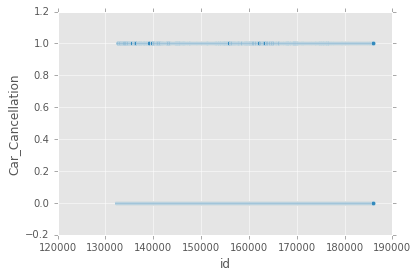

In [83]:
#getting the column index and plotting the scatter plot

ind = get_index("id")
plot_scatter(ind)
#df[['id','Car_Cancellation']].plot(kind='scatter',x = 'id' , y = 'Car_Cancellation')

In [84]:
len((df.id.unique()))

43431

Plotting the Histogram between 'id' and Car_cancellation 


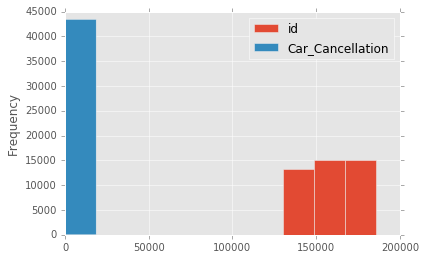

In [85]:
plot_hist(ind)

In [86]:
count_null(ind)

 The number of null values in 'id' is 0--


Analysis- A total of 43431 values with less than 5K cancellations and no Null values.

# vehicle_model_id and Cancellation
Note- vehicle_model_id is the model type

In [87]:
#getting the column index
ind = get_index("vehicle_model_id")

Plotting the data between 'vehicle_model_id' and Car_cancellation 


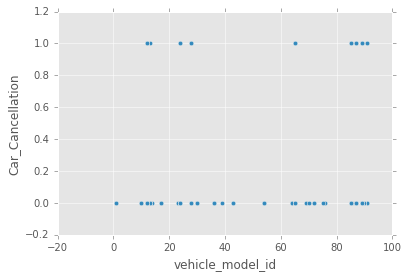

In [88]:
plot_scatter(ind)


Plotting the Histogram between 'vehicle_model_id' and Car_cancellation 


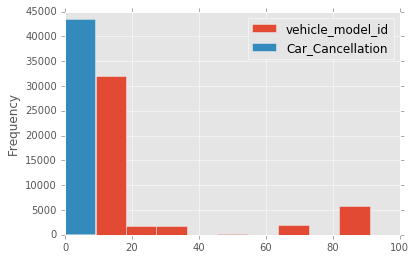

In [89]:
plot_hist(ind)

In [22]:
df.vehicle_model_id.unique()

array([28, 12, 65, 24, 87, 54, 85, 17, 23, 36, 72, 30, 43, 86, 76,  1, 69,
       14, 89, 10, 13, 64, 90, 75, 70, 91, 39])

In [23]:
len(df.vehicle_model_id.unique())

27

Plotting the Histogram between 'vehicle_model_id' and Car_cancellation 


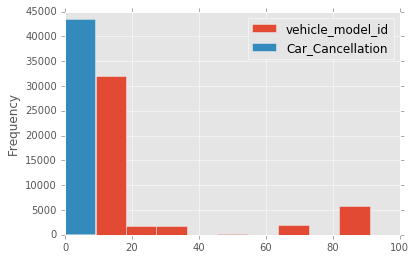

In [90]:
plot_hist(ind)

In [25]:
df[['vehicle_model_id']].describe()

,vehicle_model_id
count,43431.00000
mean,25.71723
std,26.79825
min,1.00000
25%,12.00000
50%,12.00000
75%,24.00000
max,91.00000


Findings:
1)Vehicle id is a discrete number ranging from 1 to 91
2)The moajority ~33K of the 43 K vehicles are of 'id' =10
3)There are no Null values

# package_id and cancellation
Note-type of package (1=4hrs & 40kms, 2=8hrs & 80kms, 3=6hrs & 60kms, 4= 10hrs & 100kms, 5=5hrs & 50kms, 6=3hrs & 30kms, 7=12hrs & 120kms)

In [26]:
#getting the index
ind = get_index("package_id")

Plotting the data between 'package_id' and Car_cancellation 


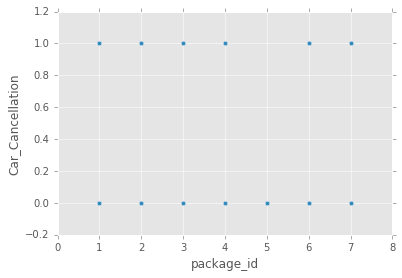

In [27]:
#scatter plots
plot_scatter(ind)

Plotting the Histogram between 'package_id' and Car_cancellation 


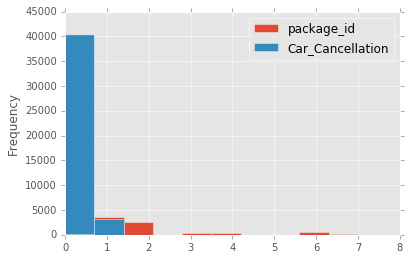

In [28]:
#Histogram
plot_hist(ind)

In [29]:
df.package_id.unique()

array([ nan,   2.,   1.,   4.,   3.,   5.,   6.,   7.])

In [30]:
len(df.package_id.unique())

8

In [31]:
df[['package_id']].describe()

,package_id
count,7550.000000
mean,2.030066
std,1.461756
min,1.000000
25%,1.000000
50%,2.000000
75%,2.000000
max,7.000000


In [32]:
df.package_id.isnull().sum()

35881

Findings:
1)Package id is a discrete varaible with 8 unique values 
2)Majority of the bookings have package_id as null(35881)

# travel_type_id and cancellation
Note-travel_type_id is the type of travel (1=long distance, 2= point to point, 3= hourly rental).

In [33]:
#Get the index
ind = get_index("travel_type_id")

Plotting the data between 'travel_type_id' and Car_cancellation 


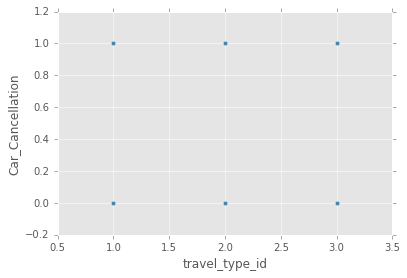

In [34]:
plot_scatter(ind)

Plotting the Histogram between 'travel_type_id' and Car_cancellation 


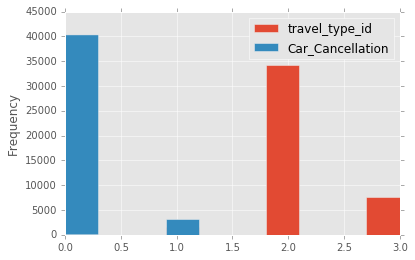

In [35]:
plot_hist(ind)

In [36]:
df.travel_type_id.unique()

array([2, 1, 3])

In [37]:
df.travel_type_id.value_counts()

2    34292
3     7550
1     1589
Name: travel_type_id, dtype: int64

Findings:
1)This is a dicrete variable with 3 unique values (no Null values)
2)Most of the booking made by the company fall in category 2 i.e. 'Point to Point'


#  from_area_id
unique identifier of area. Applicable only for point-to-point travel and packages

In [53]:
# get the index
ind = get_index('from_area_id')


Plotting the data between 'from_area_id' and Car_cancellation 


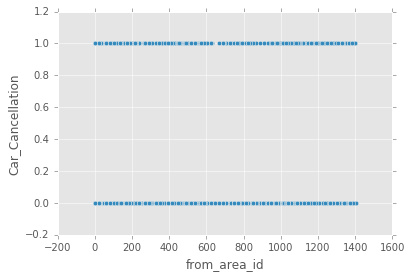

In [54]:
#plotting the scatter plot to check corelation
plot_scatter(ind)

In [ ]:
plot_hist(ind)
    

In [91]:
df.travel_type_id.unique()

array([2, 1, 3])

In [ ]:
df[['travel_type_id']].plot(kind = 'hist')

In [ ]:
df.travel_type_id.isnull().sum()

In [ ]:
df[['travel_type_id']].describe()

Findings:
1)travel_type_id is a discreet variable with 3 possible values
2)Majority of the bookings have a travel_type_id of 2

# to_area_id and Car_cancellation
unique identifier of area. Applicable only for point-to-point travel

In [ ]:
#get the index
ind = get_index('to_area_id')

In [ ]:
#Scatter plots
plot_scatter(ind)

In [ ]:
#histograms
plot_hist(ind)


In [ ]:
df[df.Car_Cancellation==1][['to_area_id']].plot(kind='hist')

In [ ]:
df[df.Car_Cancellation==1][['to_area_id']].isnull().sum()

In [ ]:
df.to_area_id.isnull().sum()

In [ ]:
df[['to_area_id']].plot(kind='hist')

In [ ]:
df.to_area_id.value_counts()

Analysis:
1)There are around 9K NULL values
2)There are 357 values with cancellation =1 and to_area_id is null

# from_city_id and Cancellation
from_city_id - unique identifier of city


In [ ]:
#getting the index
ind = get_index('from_city_id')
print ind

In [ ]:
plot_scatter(ind)

In [ ]:
plot_hist(ind)

In [ ]:
df.from_city_id.value_counts()

In [ ]:
df[df.Car_Cancellation==1][['from_city_id']].isnull().sum()

In [ ]:
df[['from_city_id','Car_Cancellation']].corr()

In [ ]:
get_corr(ind)

In [ ]:
df.from_city_id.isnull().sum()

Analysis:
1)There are around 62% of the values that are null for this variable
2)out of 3132 cancellations around 45% of the values have null for the city columns
3)There is a very small corelation between cancellation and from_city_id

# to_city_id and Car_cacellation
Note-to_city_id - unique identifier of city (only for intercity)

In [55]:
ind = get_index('to_city_id')

Plotting the data between 'to_city_id' and Car_cancellation 


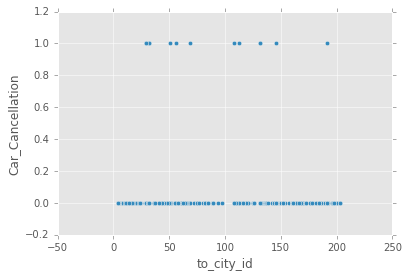

In [56]:
plot_scatter(ind)

In [59]:
get_corr(ind)

Here is the coorelation between depedent variale Car cancellation and 'to_city_id' 
                  to_city_id  Car_Cancellation
to_city_id          1.000000         -0.007882
Car_Cancellation   -0.007882          1.000000


Plotting the Histogram between 'to_city_id' and Car_cancellation 


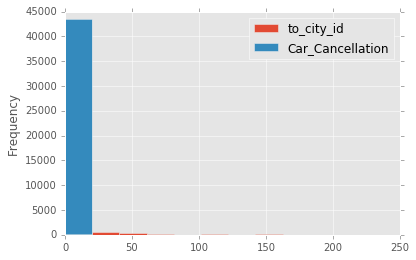

In [58]:
plot_hist(ind)

In [80]:
count_null(ind)

 The number of null values in 'to_city_id' is 41843--


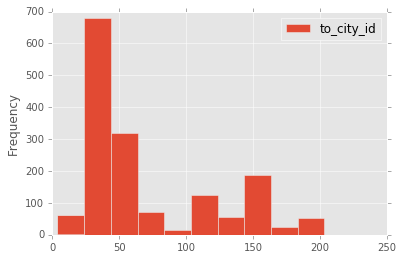

In [94]:
df[['to_city_id']].plot(kind='hist')

In [93]:
df['to_city_id'].value_counts()

32.0     475
55.0     174
29.0     116
146.0     89
108.0     64
        ... 
60.0       1
172.0      1
53.0       1
52.0       1
169.0      1
Name: to_city_id, dtype: int64

Analysis-
Majority of the column values are null in to_city_id



# from_date and car_cancellation
time stamp of requested trip start

In [97]:
ind = get_index('from_date')

Plotting the Histogram between 'from_date' and Car_cancellation 


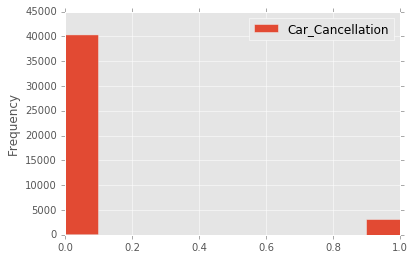

In [99]:
plot_hist(ind)

In [100]:
df.from_date.unique()

array(['1/1/13 2:00', '1/1/13 9:00', '1/1/13 3:30', ..., '11/26/13 1:00',
       '11/24/13 18:30', '11/25/13 5:00'], dtype=object)

In [101]:
count_null(ind)

 The number of null values in 'from_date' is 0--


In [102]:
df.from_date.value_counts()

7/4/13 22:15      20
10/12/13 6:00     20
9/8/13 6:00       16
5/12/13 7:30      15
5/12/13 7:00      13
                  ..
9/6/13 3:45        1
11/18/13 12:00     1
5/31/13 11:15      1
3/1/13 16:30       1
3/30/13 0:15       1
Name: from_date, dtype: int64

In [103]:
df[['from_date']].describe()

,from_date
count,43431
unique,20377
top,7/4/13 22:15
freq,20


# to_date and Car_cancellation
Note-to_date is the time stamp of trip end


In [104]:
ind = get_index('to_date')

In [105]:
count_null(ind)

 The number of null values in 'to_date' is 17890--


Plotting the Histogram between 'to_date' and Car_cancellation 


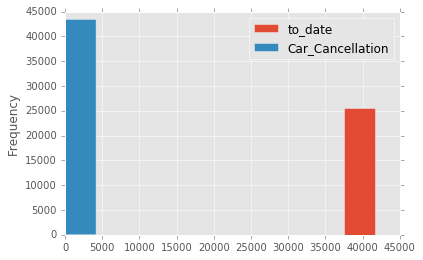

In [106]:
plot_hist(ind)

Plotting the data between 'to_date' and Car_cancellation 


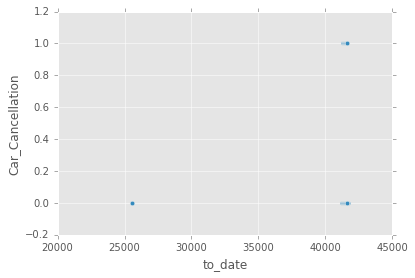

In [107]:
plot_scatter(ind)

In [108]:
df[['to_date']].describe()

,to_date
count,25541.000000
mean,41507.974840
std,305.144945
min,25569.020830
25%,41480.521110
50%,41517.761550
75%,41558.914630
max,41678.275680


Analysis-
A total of 43K values and out of which 17K are null

# online_booking
online_booking - if booking was done on desktop website


In [109]:
ind = get_index('online_booking')

Plotting the data between 'online_booking' and Car_cancellation 


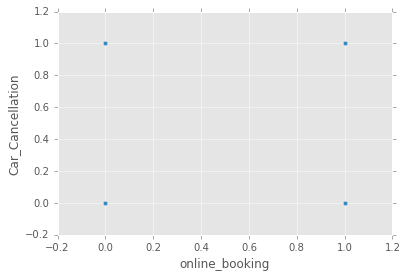

In [111]:
plot_scatter(ind)

Plotting the Histogram between 'online_booking' and Car_cancellation 


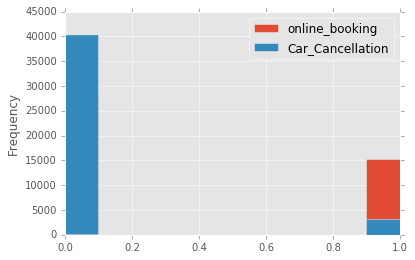

In [112]:
plot_hist(ind)

In [113]:
count_null(ind)

 The number of null values in 'online_booking' is 0--


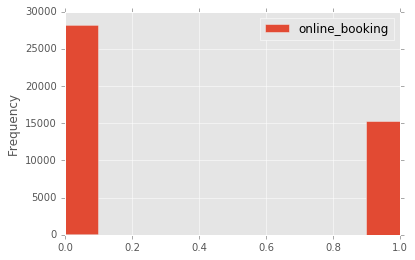

In [114]:
df[['online_booking']].plot(kind='hist')

In [132]:
df[(df.Car_Cancellation == 1)& (df.online_booking == 1)][['online_booking']].describe()

,online_booking
count,1903.0
mean,1.0
std,0.0
min,1.0
25%,1.0
50%,1.0
75%,1.0
max,1.0


Analysis: 
1)Out of the 3132 cancelled bookings there were 1903 that were done online(Desktop)
2)THere are no null values- We shoud retain this column while modelling

# mobile_site_booking and Car_cancellation
mobile_site_booking - if booking was done on mobile website


In [125]:
ind = get_index('mobile_site_booking')

In [131]:
df[(df.Car_Cancellation == 1)& (df.mobile_site_booking == 1)][['mobile_site_booking']].describe()

,mobile_site_booking
count,289.0
mean,1.0
std,0.0
min,1.0
25%,1.0
50%,1.0
75%,1.0
max,1.0


Plotting the Histogram between 'mobile_site_booking' and Car_cancellation 


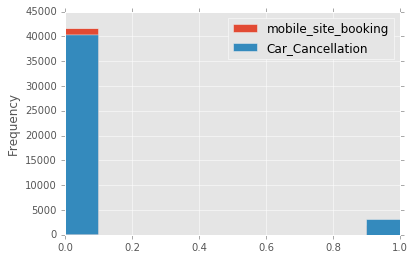

In [133]:
plot_hist(ind)

In [135]:
df.mobile_site_booking.value_counts()

0    41553
1     1878
Name: mobile_site_booking, dtype: int64

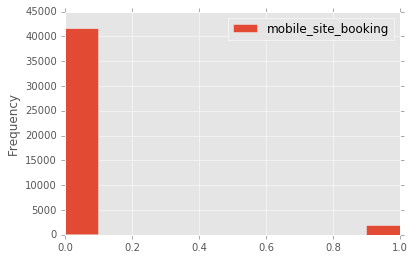

In [134]:
df[['mobile_site_booking']].plot(kind='hist')

Analyis:
1)Out of 3132 cancellation- 289 were done from the mobile web interface
2)and out of the total 43K bookings, 1878 were done via mobile interface

# booking_created and Car_Cancellation
Note-booking_created - time stamp of booking


In [138]:
ind = get_index('booking_created')

Plotting the Histogram between 'booking_created' and Car_cancellation 


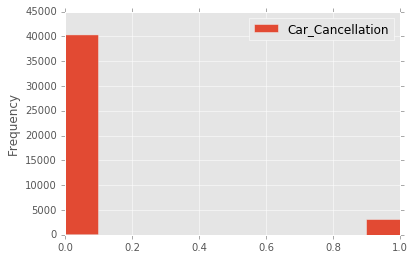

In [140]:
plot_hist(ind)

In [157]:
df[(df.Car_Cancellation == 1)]['booking_created'].value_counts().head(10)

10/31/13 10:30    11
10/31/13 12:24    11
11/13/13 10:14    10
10/31/13 9:58      9
10/31/13 12:13     9
10/31/13 12:25     8
10/31/13 10:56     8
10/31/13 9:45      8
10/31/13 9:43      7
11/12/13 12:40     7
Name: booking_created, dtype: int64

Analysis:
1)Most of the cancellations are happeing at e specific time stamp, that could be analyzed further if need be.

# from_lat and Car_Cancellation
Note-latitude of from area

In [158]:
ind =  get_index('from_lat')

In [159]:
df[(df.Car_Cancellation == 1)]['from_lat'].value_counts().head(10)

12.951850    127
13.199560    116
12.849482     99
12.924150     97
12.965190     55
12.966910     54
12.992870     45
12.974400     45
12.912810     44
12.953434     41
Name: from_lat, dtype: int64

Plotting the Histogram between 'from_lat' and Car_cancellation 


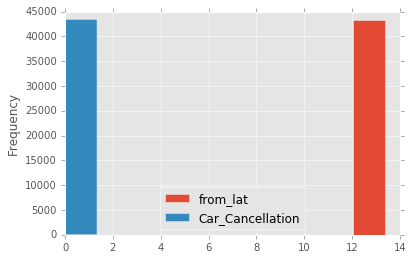

In [160]:
plot_hist(ind)

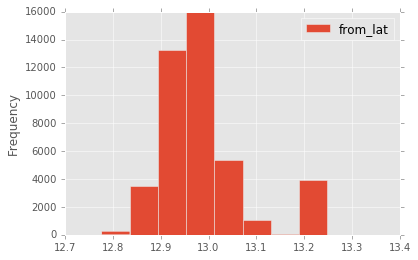

In [161]:
df[['from_lat']].plot(kind='hist')

In [162]:
count_null(ind)

 The number of null values in 'from_lat' is 93--


Analaysis:
1)There are 93 records for which this data is not available
2)The bulk of the cancellations happen from the location with latitude=12.951850

# from_long and Car_cancellation
from_long -  longitude of from area


In [220]:
ind = get_index('from_long')

Plotting the data between 'from_long' and Car_cancellation 


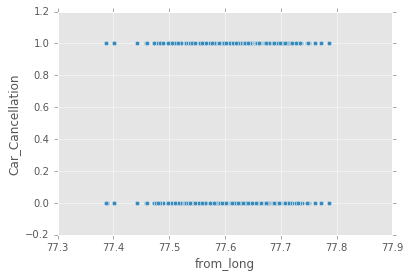

In [222]:
plot_scatter(ind)

Plotting the Histogram between 'from_long' and Car_cancellation 


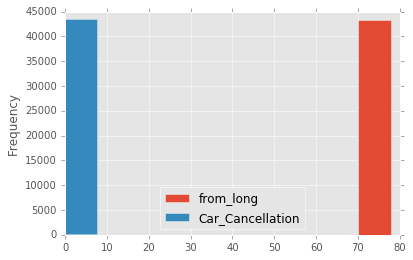

In [223]:
plot_hist(ind)

In [224]:
count_null(ind)

 The number of null values in 'from_long' is 93--


In [225]:
df[(df.Car_Cancellation == 1)]['from_long'].value_counts().head(10)

77.696420    127
77.706880    117
77.663187     99
77.672290     97
77.719320     55
77.749350     54
77.716620     45
77.691830     45
77.609230     44
77.706510     41
Name: from_long, dtype: int64

Analysis:
1)There are a total of 93 NULL values and most of the cancellations occur from a location with longitude=77.696420

# to_lat, to _longitude and Carcancellation

In [226]:
df[(df.Car_Cancellation == 1)]['to_lat'].value_counts().head(10)

12.976770    342
13.028530    155
13.199560    133
12.918730     83
12.952780     59
12.951850     54
12.849482     54
13.000418     49
12.924150     45
12.993130     35
Name: to_lat, dtype: int64

In [228]:
ind = get_index('to_lat')

In [229]:
count_null(ind)

 The number of null values in 'to_lat' is 9138--


In [230]:
ind1 = get_index('to_long')

In [231]:
count_null(ind1)

 The number of null values in 'to_long' is 9138--


In [232]:
df[(df.Car_Cancellation == 1)]['to_long'].value_counts().head(10)

77.572700    342
77.546250    155
77.706880    133
77.614940     83
77.590880     59
77.696420     54
77.663187     54
77.674835     49
77.672290     45
77.598280     35
Name: to_long, dtype: int64

In [233]:
df[(df.Car_Cancellation == 1)].count()

id                  3132
user_id             3132
vehicle_model_id    3132
package_id           336
travel_type_id      3132
                    ... 
from_long           3130
to_lat              2775
to_long             2775
Car_Cancellation    3132
Cost_of_error       3132
dtype: int64

Analysis:
1)A total of 342 cancellations(approx 11%) are occuring for the location with co-ordinates as (12.976770,77.572700 )
2)A totoal of 9138 bookings do not have a value for this comumn
3)Of the total 